In [1]:
import glob, sys, re
import numpy as np
from collections import defaultdict, OrderedDict
from lasagne_utils import load_log
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
font = {'weight' : 'normal',
        'size'   : 18}
matplotlib.rc('font', **font)
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

import theano.tensor as T
import lasagne, theano

datasets_dir = '/home/dneil/datasets/driving/'

def get_rainbow_colors(log_list, kind='gist_rainbow'):
    num_keys = len(log_list)
    cm = plt.get_cmap(kind)
    color_dict = {grp_key: cm(1.*i/(num_keys)) for i, grp_key in enumerate(log_list)}
    return color_dict


Couldn't import dot_parser, loading of dot files will not be possible.


WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GTX 980 Ti (CNMeM is disabled, cuDNN not available)


In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import matplotlib.patches as mpatches
FFMpegWriter = manimation.writers['ffmpeg']


driving_rnn_10.6_multi_aps_multi_final, last : Train: 9.834006, Test: 91.734023
driving_rnn_10.6_multi_dvs5k_multi_recent, last : Train: 9.601310, Test: 65.947639
driving_rnn_10.6_multi_dvs10ms_multi_final, last : Train: 12.450970, Test: 55.901004
driving_rnn_10.6_multi_everything_multi_recent, last : Train: 9.715975, Test: 65.990573


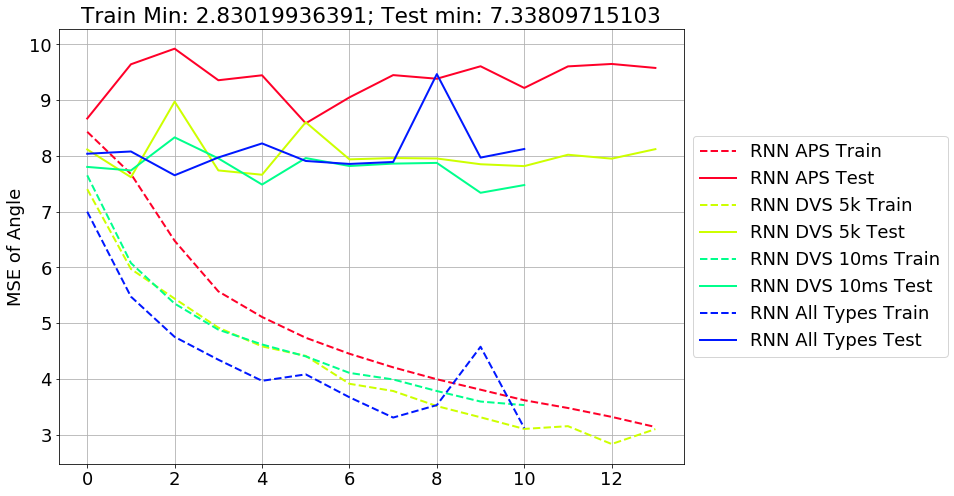

In [3]:
filenames = [
#             'driving_cnn_19.4_multi_aps_multi_final',             
#              'driving_cnn_19.4_multi_dvs5k_multi_recent',
#              'driving_cnn_19.4_multi_dvs10ms_multi_final',
#              'driving_cnn_19.4_multi_everything_multi_recent',    
             'driving_rnn_10.6_multi_aps_multi_final',             
             'driving_rnn_10.6_multi_dvs5k_multi_recent',
             'driving_rnn_10.6_multi_dvs10ms_multi_final',
             'driving_rnn_10.6_multi_everything_multi_recent'
            ]

colors = get_rainbow_colors(filenames)

# Load history from file
plt.figure(figsize=(14,8))
minval = 1e8
mintrain = 1e8

plt.figure(figsize=(14,8))
for filename in filenames:
    # Architecture Type
    if '_rnn_' in filename:
        label = 'RNN '
    if '_cnn_' in filename:
        label = 'CNN '        
    # Data Type
    if '_aps_' in filename:
        label += 'APS'
    if '_dvs5k_' in filename:
        label += 'DVS 5k'        
    if '_dvs10ms_' in filename:
        label += 'DVS 10ms'    
    if '_everything_' in filename:
        label += 'All Types'            
        
    history = load_log(filename)
    minval = np.min([minval] + list(map(np.sqrt, history['test_err'])))
    mintrain = np.min([mintrain] + list(map(np.sqrt, history['train_err'])))
    plt.plot(map(np.sqrt, history['train_err']), '--', label=label+' Train', color=colors[filename], lw=2)
    plt.plot(map(np.sqrt, history['test_err']), '-', label=label+' Test', color=colors[filename], lw=2)
    print('{}, last : Train: {:.6f}, Test: {:.6f}'.format(filename, 
        history['train_err'][-1], history['test_err'][-1]))
plt.grid(which='both')
plt.title('Train Min: {}; Test min: {}'.format(mintrain, minval))
plt.ylabel('MSE of Angle')

# Shrink current axis by 20%
ax = plt.gca()
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
plt.gca().legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.savefig('results_acc.png', bbox_inches='tight')

rec1487839456_frames.hdf5: 41.0204200745 <--> 204.975950003 <--> 368.766131163
rec1487839456_bin5k.hdf5: 31.3624720573 <--> 158.67561698 <--> 357.245671034
rec1487839456_bin10ms.hdf5: 40.9907140732 <--> 204.866177082 <--> 368.70454812


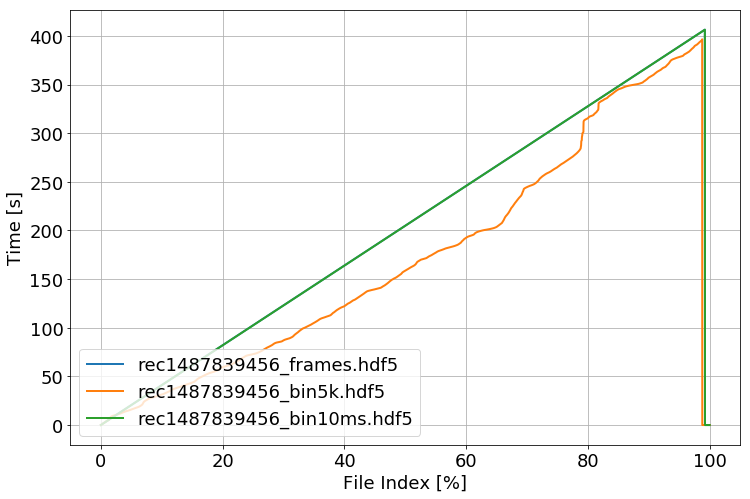

In [4]:
# Check timestamps
import time, h5py
rec_id = 'rec1487839456'

h5_filenames = [datasets_dir + rec_id + '_frames.hdf5',                
                datasets_dir + rec_id + '_bin5k.hdf5',
                datasets_dir + rec_id + '_bin10ms.hdf5']
plt.figure(figsize=(12,8))
for h5f_name in h5_filenames:
    h5f = h5py.File(h5f_name, 'r')
    data = np.array(h5f['timestamp'])
    percentage = np.linspace(0, 100, len(data))
    plt.plot(percentage, data, label=h5f_name.replace(datasets_dir, ''), lw=2)
    print('{}: {} <--> {} <--> {}'.format(h5f_name.replace(datasets_dir, ''), 
                                          data[len(data)//10], data[len(data)//2], data[-len(data)//10]))
plt.grid(which='both')
plt.legend(loc='lower left')
plt.xlabel('File Index [%]')
plt.ylabel('Time [s]')
plt.savefig('export1.png')

rec1487858093_frames.hdf5: 245.799206018 <--> 1228.90251708 <--> 2211.90005422
rec1487858093_bin5k.hdf5: 165.795648098 <--> 1187.70429301 <--> 2141.66645908
rec1487858093_bin10ms.hdf5: 243.711982012 <--> 1218.5655992 <--> 2193.40247917


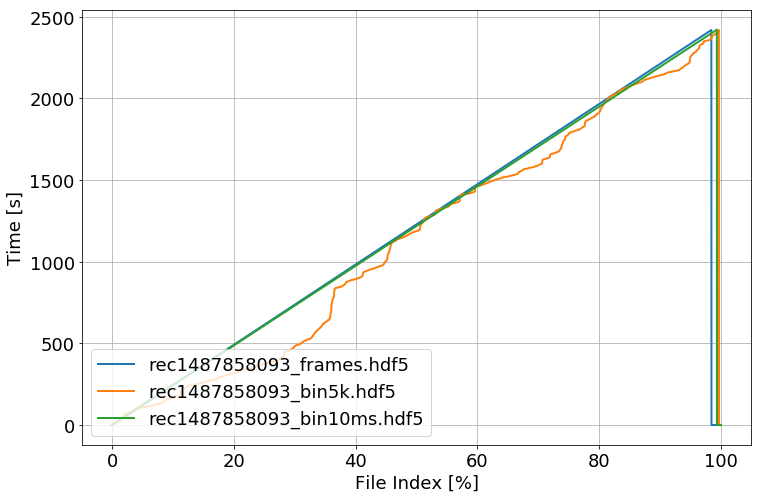

In [5]:
# Check timestamps
import time, h5py
rec_id = 'rec1487858093'

h5_filenames = [datasets_dir + rec_id + '_frames.hdf5',                
                datasets_dir + rec_id + '_bin5k.hdf5',
                datasets_dir + rec_id + '_bin10ms.hdf5'
               ]
plt.figure(figsize=(12,8))
for h5f_name in h5_filenames:
    h5f = h5py.File(h5f_name, 'r')
    data = np.array(h5f['timestamp'])
    percentage = np.linspace(0, 100, len(data))
    plt.plot(percentage, data, label=h5f_name.replace(datasets_dir, ''), lw=2)
    print('{}: {} <--> {} <--> {}'.format(h5f_name.replace(datasets_dir, ''), 
                                          data[len(data)//10], data[len(data)//2], data[-len(data)//10]))
plt.grid(which='both')
plt.legend(loc='lower left')
plt.xlabel('File Index [%]')
plt.ylabel('Time [s]')
plt.savefig('export2.png')

In [6]:
from hdf5_deeplearn_utils import MultiHDF5SeqVisualIterator
from multitrain_test_rnn import get_simple_driving_rnn
from lasagne_utils import get_output_fn, load_model, ftensor5
import time, h5py
datasets_dir = '/home/dneil/datasets/driving/'
rec_id = 'rec1487864316'
h5_filenames = [datasets_dir + rec_id + '_frames.hdf5',                
                datasets_dir + rec_id + '_bin5k.hdf5']
net_filenames = ['driving_rnn_10.6_multi_everything_multi_recent',
                 'driving_rnn_10.6_multi_everything_multi_recent']
dataset_keys = ['aps_frame_60x80', 
                'dvs_frame_60x80']

d = MultiHDF5SeqVisualIterator()

# Subset capture
keep_first = 10000

# Create symbolic vars
vid_in = ftensor5('vid_in')

# Build model
print("Building network ...")
network = get_simple_driving_rnn(vid_in)
print("Compiling network ...")
out_fn = get_output_fn([vid_in], network)

out_angles = defaultdict(list)
out_times = defaultdict(list)
out_vids = defaultdict(list)
for h5f_name, net_filename, dataset_key in zip(h5_filenames, net_filenames, dataset_keys):
    start_time = time.time()
    print('Running {} and storing the video...this will use up lots of RAM.'.format(net_filename))
    # Load parameters
    load_model(net_filename, network)
    h5f = h5py.File(h5f_name, 'r')

    # Define data key
    data_key = h5f_name + '|' + net_filename
    
    curr_idx = 0

    for data in d.flow([h5f], [dataset_key], 'test_idxs', batch_size=128, shuffle=False, return_time=True, speed_gt=50):
        vid_in, bY, times = data
        out_angles[data_key].extend(out_fn(vid_in)[:,-1])
        out_angles[data_key+'_true'].extend(bY[:,-1])
        out_times[data_key].extend(times[:, -1])
        if curr_idx < keep_first:
            # To save RAM, only save the first few
            out_vids[data_key].extend(vid_in[:,-1, 0, :, :])
        curr_idx += vid_in.shape[0]

    h5f.close()
    print('{} completed in {:.2f}s.'.format(net_filename, time.time()-start_time))

Building network ...
Compiling network ...


/usr/local/lib/python2.7/dist-packages/lasagne/layers/pool.py:266: UserWarning: DEPRECATION: the 'ds' parameter is not going to exist anymore as it is going to be replaced by the parameter 'ws'.
  mode=self.mode,
/usr/local/lib/python2.7/dist-packages/lasagne/layers/pool.py:266: UserWarning: DEPRECATION: the 'st' parameter is not going to exist anymore as it is going to be replaced by the parameter 'stride'.
  mode=self.mode,
/usr/local/lib/python2.7/dist-packages/lasagne/layers/pool.py:266: UserWarning: DEPRECATION: the 'padding' parameter is not going to exist anymore as it is going to be replaced by the parameter 'pad'.
  mode=self.mode,


Running driving_rnn_10.6_multi_everything_multi_recent and storing the video...this will use up lots of RAM.
driving_rnn_10.6_multi_everything_multi_recent completed in 7.03s.
Running driving_rnn_10.6_multi_everything_multi_recent and storing the video...this will use up lots of RAM.
driving_rnn_10.6_multi_everything_multi_recent completed in 138.76s.


(-360, 360)

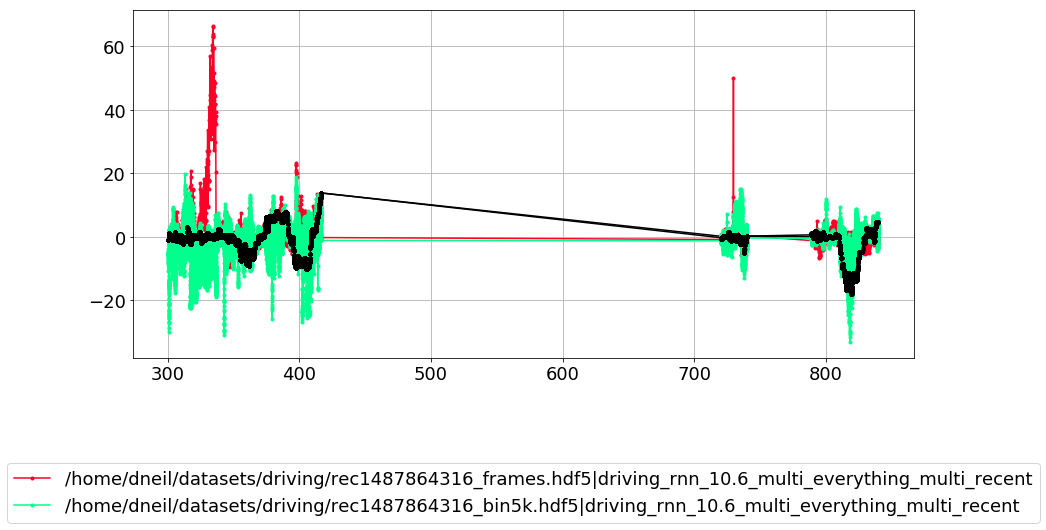

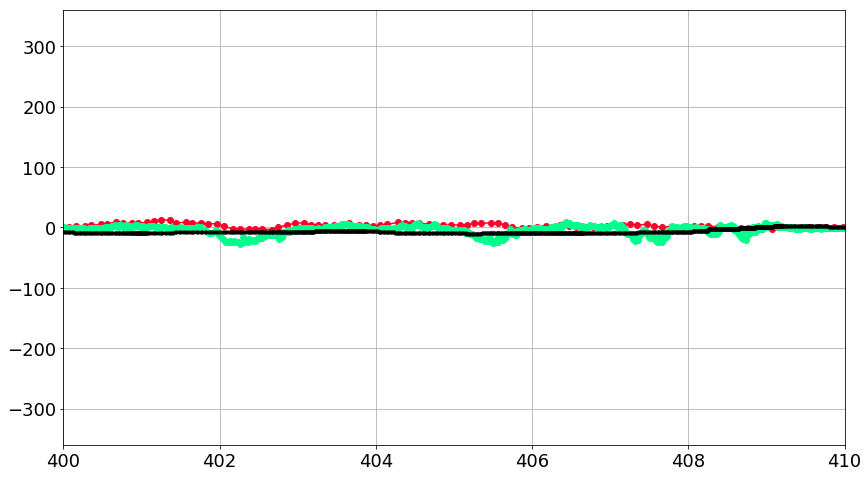

In [7]:
# zoom_region = [3851, 3853]
zoom_region = [400, 410]

keys = [h5f+'|'+filename for h5f, filename in zip(h5_filenames, net_filenames)]

plt.figure(figsize=(14,8))
colors = get_rainbow_colors(keys)
for key in keys:
    plt.plot(out_times[key], out_angles[key], '.-', color=colors[key], label=key)
    plt.plot(out_times[key], out_angles[key+'_true'], '.-', color='k')    
plt.grid(which='both')
ax = plt.gca()
box = plt.gca().get_position()
plt.gca().set_position([box.x0, box.y0, box.width, box.height*0.8])
# Put a legend to the right of the current axis
plt.gca().legend(loc='lower center', bbox_to_anchor=(0.5, -0.5))

plt.figure(figsize=(14,8))
for key in keys:
    plt.plot(out_times[key], out_angles[key], 'o-', color=colors[key])
    plt.plot(out_times[key], out_angles[key+'_true'], '.-', color='k')    
plt.grid(which='both')
plt.xlim(zoom_region)
plt.ylim([-360, 360])

In [8]:
import matplotlib.pyplot as plt
import matplotlib.animation as manimation
import matplotlib.patches as mpatches

net_filename_aps = net_filenames[0]
net_filename_dvs = net_filenames[1]
h5_filename_aps = h5_filenames[0]
h5_filename_dvs = h5_filenames[1]

aps_key = h5_filename_aps + '|' + net_filename_aps
dvs_key = h5_filename_dvs + '|' + net_filename_dvs

h5faps = h5py.File(h5_filename_aps, 'r')
h5fdvs = h5py.File(h5_filename_dvs, 'r')

def get_closest_idx(times, targ_time):
    first_bigger = np.argwhere(np.array(times)>=targ_time).flatten()[0]
    last_smaller = first_bigger - 1 if first_bigger > 0 else 0
    if abs(times[last_smaller]-targ_time) < abs(times[first_bigger]-targ_time):
        return last_smaller
    else:
        return first_bigger

def get_center_radius(kind):
    if kind=='aps':
        c, r = (40., 30.), 15. #center, radius
    if kind=='dvs':
        c, r = (40., 30.), 15. #center, radius
    return c, r

def plot_steering_angle(ax, angle, angle_guess, kind='aps', other_color='b'):
    c,r = get_center_radius(kind)
    a_rad = float(angle) / 180. * np.pi + np.pi / 2
    t = (c[0] + np.cos(a_rad) * r, c[1] - np.sin(a_rad) * r)
    ax.add_artist(mpatches.Circle(c, r, edgecolor='r', facecolor='none'))
    angle_line, = ax.plot((c[0], t[0]), (c[1], t[1]), 'r', lw=2, zorder='2')    
    angle_line_guess, = ax.plot((c[0], t[0]), (c[1], t[1]), other_color, lw=2, zorder='2')    
    # text = plt.text(c[0], c[1]+30, '{:0.1f} deg'.format(angle), color='r')
    text = None
    return angle_line, angle_line_guess, text

def plot_angle_on_top(angle, h_l, kind):
    c,r = get_center_radius(kind)
    a_rad = angle / 180. * np.pi + np.pi / 2    
    t = (c[0] + int(np.cos(a_rad) * r), c[1] - int(np.sin(a_rad) * r))    
    h_l.set_data((c[0], t[0]), (c[1], t[1]))
    # h_t.set_text(angle)
print('Functions defined.')

Functions defined.


Beginning write...
Starting at timestamp 303.172851562
Done with 20s of data in 71.7317638397s.


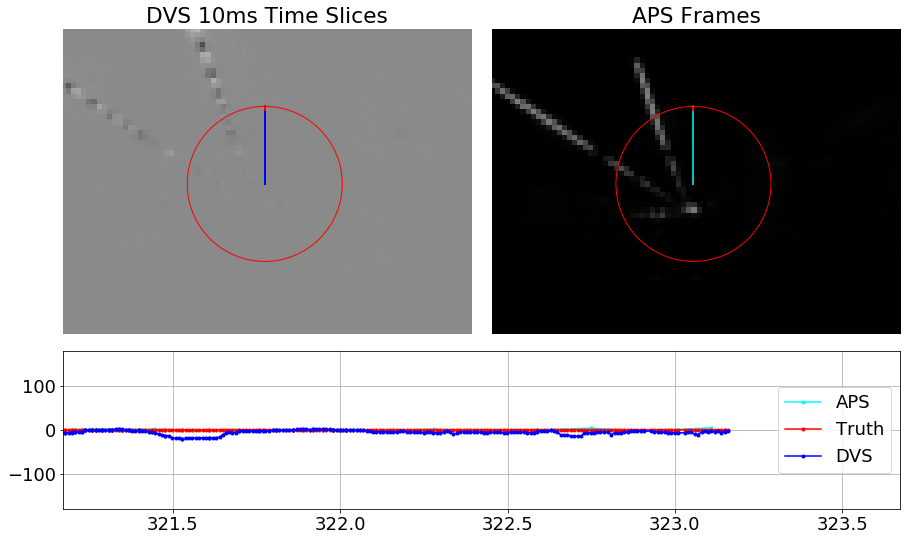

In [9]:
FFMpegWriter = manimation.writers['ffmpeg']
metadata = dict(title='DVS 10ms Slice Driving Data')
writer = FFMpegWriter(fps=60, metadata=metadata, bitrate=-1, codec="libx264")

# Build grid of plots
fig = plt.figure(figsize=(15,9))
ax1 = plt.subplot2grid((3, 2), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 2), (0, 1), rowspan=2)
ax3 = plt.subplot2grid((3, 2), (2, 0), colspan=3)
plt.subplots_adjust(hspace=0.05, wspace=0.05)

# Build DVS render
dvs_im = ax1.imshow(np.zeros((60, 80)), interpolation='nearest', cmap='gray')
ax1.set_title('DVS 10ms Time Slices')
ax1.set_ylim([0, 59])
ax1.set_xlim([79, 0])
dvs_im.set_clim([-0.5, 0.5])
ax1.axis('off')
ax1.invert_yaxis()
dvs_angle_line, dvs_angle_guess, text = plot_steering_angle(ax1, 0, 0, 'dvs')

# Build APS render
aps_im = ax2.imshow(np.zeros((60, 80)), interpolation='nearest', cmap='gray')
ax2.set_title('APS Frames')
ax2.set_ylim([0, 59])
ax2.set_xlim([79, 0])
aps_im.set_clim([-0.5, 0.5])
ax2.axis('off')
ax2.invert_yaxis()
# Get handles for the angles
aps_angle_line, aps_angle_guess, text = plot_steering_angle(ax2, 0, 0, 'aps', other_color='c')

# Plot the angle history bottom plot
h_a, = ax3.plot([0, 0], [1, 1], '.-', color='cyan', label='APS')    
h_t, = ax3.plot([0, 0], [1, 1], '.-', color='red', label='Truth')
h_d, = ax3.plot([0, 0], [1, 1], '.-', color='blue', label='DVS')
ax3.grid(which='both')
ax3.set_ylim([-180, 180])
ax3.get_xaxis().get_major_formatter().set_useOffset(False)
ax3.legend(loc='center right')

# Set up constants
START_TIME = 300
DURATION = 20
curr_frame = 0
FPS = 60
means = []
time_window = 2
lookahead = 0.5
RNN_OFFSET = -1
RESULT_OFFSET=RNN_OFFSET
aps_vid_key = 'aps_frame_60x80'
dvs_vid_key = 'dvs_frame_60x80'

print('Beginning write...')
if START_TIME < out_times[aps_key][0]:
    curr_time = out_times[aps_key][0]
else:
    curr_time = START_TIME
final_time = curr_time + DURATION

aps_test_idxs = list(h5faps['test_idxs'])
dvs_test_idxs = list(h5fdvs['test_idxs'])
print('Starting at timestamp {}'.format(curr_time))
with writer.saving(fig, 'dvs_aps_jonathan_cnn.mp4', 100):
    start_time = time.time()
    
    while curr_time < final_time:
        # Get data indexes
        aps_result_idx = get_closest_idx(out_times[aps_key], curr_time)
        dvs_result_idx = get_closest_idx(out_times[dvs_key], curr_time)
        # Get Data
        aps_data = out_vids[aps_key][aps_result_idx].astype('float32')
        dvs_data = out_vids[dvs_key][dvs_result_idx].astype('float32')
        # Plot Data
        aps_im.set_data(aps_data)
        dvs_im.set_data(dvs_data)
        # Plot Angles
        plot_angle_on_top(out_angles[aps_key+'_true'][aps_result_idx], aps_angle_line, 'aps')
        plot_angle_on_top(out_angles[aps_key][aps_result_idx], aps_angle_guess, 'aps')
        plot_angle_on_top(out_angles[dvs_key+'_true'][dvs_result_idx], dvs_angle_line, 'dvs')
        plot_angle_on_top(out_angles[dvs_key][dvs_result_idx], dvs_angle_guess, 'dvs')
        # Plot history
        aps_start, aps_end = get_closest_idx(out_times[aps_key], curr_time-time_window), aps_result_idx
        dvs_start, dvs_end = get_closest_idx(out_times[dvs_key], curr_time-time_window), dvs_result_idx
        h_a.set_data(out_times[aps_key][aps_start:aps_end], out_angles[aps_key][aps_start:aps_end])        
        h_d.set_data(out_times[dvs_key][dvs_start:dvs_end], out_angles[dvs_key][dvs_start:dvs_end])
        h_t.set_data(out_times[dvs_key][dvs_start:dvs_end], out_angles[dvs_key+'_true'][dvs_start:dvs_end])
        ax3.set_xlim([curr_time-time_window, curr_time+lookahead])        
        # Save frame
        writer.grab_frame()
        # Advance
        curr_time += 1./FPS

print('Done with {}s of data in {}s.'.format(DURATION, time.time()-start_time))